## Analysis of the entire corpus

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, f1_score,precision_score, recall_score

In [2]:
corpus = pd.read_csv("Macocu-sl-en-predicted.csv", sep = "\t", index_col = 0)
corpus.head(3)

,biroamer_entities,translation_direction,en_source,en_var_doc,en_var_dom,sl_source,en_domain,sl_domain,average_score,en_doc,sl_doc,en_length,sl_length,punct_ratio,X-GENRE,label_distribution,chosen_category_distr
2584979,No,sl-orig,http://15.liffe.si/?lang_chg=en,B,B,http://15.liffe.si/?lang_chg=sl,15.liffe.si,15.liffe.si,0.936808,It went out with a bang. The evening sparkled ...,Končalo se je razburljivo in z razkošjem. Veče...,574,463,0.103501,Opinion/Argumentation,"{'Other': 0.0003, 'Information/Explanation': 0...",0.988794
1212933,No,sl-orig,http://16.liffe.si/?lang_chg=en,B,B,http://16.liffe.si/index.php?menu_item=domov,16.liffe.si,16.liffe.si,0.900000,Some days ago the organisers of the 17th Liffe...,Pred dnevi smo se iz 59. mednarodnega filmskeg...,293,184,0.076220,News,"{'Other': 0.0009, 'Information/Explanation': 0...",0.961600
598330,Yes,sl-orig,http://17.liffe.si/?lang_chg=en,B,B,http://17.liffe.si/?lang_chg=sl,17.liffe.si,17.liffe.si,0.957875,17th LIFFe was brought to an end with the best...,S podelitvijo nagrad in predvajanjem Režiserja...,445,418,0.073930,News,"{'Other': 0.0001, 'Information/Explanation': 0...",0.997264


In [5]:
print(corpus["X-GENRE"].value_counts(normalize=True).to_markdown())

|                         |    X-GENRE |
|:------------------------|-----------:|
| Information/Explanation | 0.317935   |
| Promotion               | 0.30827    |
| News                    | 0.133635   |
| Instruction             | 0.106535   |
| Legal                   | 0.0576188  |
| Opinion/Argumentation   | 0.0477669  |
| Other                   | 0.0215506  |
| Forum                   | 0.00397812 |
| Prose/Lyrical           | 0.00271101 |


In [6]:
print(corpus["chosen_category_distr"].describe().to_markdown())

|       |   chosen_category_distr |
|:------|------------------------:|
| count |           101807        |
| mean  |                0.970066 |
| std   |                0.089027 |
| min   |                0.247184 |
| 25%   |                0.995622 |
| 50%   |                0.998666 |
| 75%   |                0.998966 |
| max   |                0.999145 |


In [17]:
corpus[corpus["label_distribution"] < 0.3]["X-GENRE"].to_list()

['Forum', 'Other', 'Legal', 'Information/Explanation', 'Promotion']

In [16]:
corpus[corpus["label_distribution"] < 0.3].en_doc.to_list()

['Student is part of DIR organizing student team, which starts with event organisation at the beginning of November. In the following step, the student and team are searching for matching industrial partners having available adequate industrial robots. In year 2015 offered their cooperation 17 industrial partners. After that student prepares all surrounding hardware, sensors and programs for all applications/robots. At the end of february are oppened registrations for the second group of students. Registrations are meant for any other student (who is not subject of this syllabus), who would at selected time have the prepared application available only for him. Nonregistered students and other younger or older visitors are welcome only for observation. The syllabus for student is in addition to complete preparison of robot application and cooperation with industry also including promotion of event in electronic and printed media, as well three day, full day demonstration in the week of 

In [12]:
LABELS = list(corpus["X-GENRE"].unique())
print(LABELS)

['Opinion/Argumentation', 'News', 'Promotion', 'Legal', 'Information/Explanation', 'Other', 'Instruction', 'Prose/Lyrical', 'Forum']


In [8]:
for i in LABELS:
    print(i)
    filtered_corpus = corpus[corpus["X-GENRE"] == i]
    print(filtered_corpus["en_var_doc"].value_counts(normalize="True").to_markdown())

Opinion/Argumentation
|     |   en_var_doc |
|:----|-------------:|
| B   |    0.432243  |
| UNK |    0.335801  |
| A   |    0.167386  |
| MIX |    0.0645692 |
News
|     |   en_var_doc |
|:----|-------------:|
| B   |    0.550533  |
| UNK |    0.312165  |
| A   |    0.092025  |
| MIX |    0.0452775 |
Promotion
|     |   en_var_doc |
|:----|-------------:|
| B   |    0.355404  |
| UNK |    0.345017  |
| A   |    0.22212   |
| MIX |    0.0774599 |
Legal
|     |   en_var_doc |
|:----|-------------:|
| B   |    0.678145  |
| UNK |    0.223491  |
| A   |    0.062223  |
| MIX |    0.0361405 |
Information/Explanation
|     |   en_var_doc |
|:----|-------------:|
| B   |    0.433329  |
| UNK |    0.35912   |
| A   |    0.144186  |
| MIX |    0.0633651 |
Other
|     |   en_var_doc |
|:----|-------------:|
| B   |    0.461258  |
| UNK |    0.309936  |
| A   |    0.153601  |
| MIX |    0.0752051 |
Instruction
|     |   en_var_doc |
|:----|-------------:|
| UNK |    0.479071  |
| B   |    0.27180

## Manual analysis of a sample

### Creation of the sample

In [9]:
# Create a sample corpus for manual inspection where the labels are stratified

from sklearn.model_selection import train_test_split
rest, sample = train_test_split(corpus, test_size=100, random_state=42, shuffle = True, stratify = corpus["X-GENRE"])

sample

,biroamer_entities,translation_direction,en_source,en_var_doc,en_var_dom,sl_source,en_domain,sl_domain,average_score,en_doc,sl_doc,en_length,sl_length,punct_ratio,X-GENRE,label_distribution,chosen_category_distr
3118013,No,sl-orig,http://galerijalkatraz.org/?p=11500,MIX,B,http://galerijalkatraz.org/?p=11451,galerijalkatraz.org,galerijalkatraz.org,0.922638,20 May 2016 &gt; 23 May 2016 Kindly invited to...,Maj 2016 &gt; 23 Maj 2016 Vljudno vabljeni na ...,1022,682,0.095557,Other,"{'Other': 0.9023, 'Information/Explanation': 0...",0.902287
1999145,No,sl-orig,https://cor.europa.eu/en/news/Pages/Bringing-E...,B,B,https://cor.europa.eu/sl/news/Pages/bringing-e...,cor.europa.eu,cor.europa.eu,0.932378,1) Rethink the EU democratic model to better r...,Evropski odbor regij (OR) je 2. julija sprejel...,955,940,0.081323,News,"{'Other': 0.0122, 'Information/Explanation': 0...",0.607548
2021958,No,sl-orig,https://www.turistica.si/en/news/brezplacna-ce...,B,B,https://www.turistica.si/si/novice/brezplacna-...,turistica.si,turistica.si,0.795667,The course was prepared in frame of a network-...,Tečaja je pripravila UNESCO-va mreža 10 univer...,165,116,0.106061,Other,"{'Other': 0.9902, 'Information/Explanation': 0...",0.990174
2435571,Yes,sl-orig,http://ricinus2.mf.uni-lj.si/BS/neva.exe?name=...,MIX,MIX,http://ricinus2.mf.uni-lj.si/BS/neva.exe?n=bs_...,ricinus2.mf.uni-lj.si,ricinus2.mf.uni-lj.si,0.838000,Vogt Guenter; Štrus Jasna Hypogean life-style ...,Žust J; Klemenc N; Vospernik P; Pestevšek U; V...,250,149,0.024911,Information/Explanation,"{'Other': 0.0001, 'Information/Explanation': 0...",0.999114
1057034,No,sl-orig,https://dk.um.si/Iskanje.php?type=napredno&amp...,B,MIX,https://dk.um.si/Iskanje.php?type=napredno&amp...,dk.um.si,dk.um.si,0.767476,"Furthermore, the results from cellulose and su...",Za določitev uporabnosti metode izolacije iz p...,386,151,0.085653,Information/Explanation,"{'Other': 0.0001, 'Information/Explanation': 0...",0.999091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1558752,No,sl-orig,https://eur-lex.europa.eu/legal-content/en/ALL...,B,B,https://eur-lex.europa.eu/legal-content/SL/TXT...,eur-lex.europa.eu,eur-lex.europa.eu,0.790200,"HAS ADOPTED THIS REGULATION: CHAPTER I SCOPE, ...","Zlasti je pomembno, da se Komisija pri svojem ...",104,6772,0.050000,Legal,"{'Other': 0.0003, 'Information/Explanation': 0...",0.997087
1841516,No,sl-orig,http://www.drustvo-mknz.si/waawe1.html,UNK,MIX,http://www.drustvo-mknz.si/waawe.html,drustvo-mknz.si,drustvo-mknz.si,0.963667,"Waawe are from Tabor, in the southern Czech Re...",Waawe prihajajo iz Tabora na jugu Češke. Skupi...,191,170,0.132780,Information/Explanation,"{'Other': 0.0001, 'Information/Explanation': 0...",0.999114
1789650,No,sl-orig,https://odeja.si/en/collections/bedlinen-alleg...,B,B,https://odeja.si/slo/kolekcija/posteljnina-all...,odeja.si,odeja.si,0.939143,The bed cover is made from high-quality cotton...,Pregrinjalo za posteljo je izdelano iz vrhunsk...,179,110,0.098131,Promotion,"{'Other': 0.0002, 'Information/Explanation': 0...",0.999010
854977,No,sl-orig,https://bsf.si/en/movie/mesto-svetlobe/,UNK,B,https://bsf.si/sl/film/mesto-svetlobe/,bsf.si,bsf.si,0.889750,City of Light A well-established writer fights...,Mesto svetlobe Uveljavljen pisatelj se bori z ...,87,71,0.090000,Opinion/Argumentation,"{'Other': 0.0002, 'Information/Explanation': 0...",0.997819


In [10]:
# Analyze label distribution
sample["X-GENRE"].value_counts()

Information/Explanation    32
Promotion                  31
News                       13
Instruction                11
Legal                       6
Opinion/Argumentation       5
Other                       2
Name: X-GENRE, dtype: int64

In [14]:
# Add to the sample instances of underrepresented labels so that each has at least 10 instances
final_sample = sample

for i in ['Opinion/Argumentation', 'Legal',  'Other', 'Prose/Lyrical', 'Forum']:
	added_instances = corpus[corpus["X-GENRE"] == i].sample(n=10)
	final_sample = pd.concat([final_sample, added_instances])

In [17]:
final_sample.shape

(150, 17)

In [16]:
# Drop any duplicates
final_sample = final_sample.drop_duplicates()

In [18]:
final_sample["X-GENRE"].value_counts()

Information/Explanation    32
Promotion                  31
Legal                      16
Opinion/Argumentation      15
News                       13
Other                      12
Instruction                11
Prose/Lyrical              10
Forum                      10
Name: X-GENRE, dtype: int64

In [21]:
# Shuffle the instances
from sklearn.utils import shuffle
final_sample = shuffle(final_sample)

final_sample.tail()

,biroamer_entities,translation_direction,en_source,en_var_doc,en_var_dom,sl_source,en_domain,sl_domain,average_score,en_doc,sl_doc,en_length,sl_length,punct_ratio,X-GENRE,label_distribution,chosen_category_distr
1999303,No,sl-orig,https://mgml.si/en/city-art-gallery/events/arc...,B,B,https://mgml.si/sl/dogodki/arhiv/2015/,mgml.si,mgml.si,0.879944,"Exhibition deals with laughter, a continuation...","Tokratna razstava se posveča tematiki smeha, k...",530,430,0.074074,Promotion,"{'Other': 0.01, 'Information/Explanation': 0.0...",0.987622
1819059,No,sl-orig,https://www.goopti.com/en/about/goopti_blog/ad...,MIX,MIX,https://www.goopti.com/sl/o-goopti/goopti-blog...,goopti.com,goopti.com,0.934722,Mostly I'm attracted to warm places with a 'Me...,Najbolj me privlačijo toplejši kraji z 'medite...,559,490,0.097179,Forum,"{'Other': 0.0008, 'Information/Explanation': 0...",0.997394
369763,No,sl-orig,https://bsf.si/en/movie/rezine-casa/,UNK,B,https://bsf.si/sl/film/rezine-casa/,bsf.si,bsf.si,0.978000,Two women were born during the First World War...,Obe ženski sta se rodili med prvo svetovno voj...,75,72,0.087912,Opinion/Argumentation,"{'Other': 0.012, 'Information/Explanation': 0....",0.867477
3139071,No,sl-orig,https://lifeslovenija.si/en/may-and-june-reser...,A,B,https://lifeslovenija.si/maj-v-znamenju-life-d...,lifeslovenija.si,lifeslovenija.si,0.925920,We started May with the second LIFE writer’s w...,Maj smo začeli z drugo LIFE delavnico za pripr...,438,361,0.100592,News,"{'Other': 0.0001, 'Information/Explanation': 0...",0.997997
2021958,No,sl-orig,https://www.turistica.si/en/news/brezplacna-ce...,B,B,https://www.turistica.si/si/novice/brezplacna-...,turistica.si,turistica.si,0.795667,The course was prepared in frame of a network-...,Tečaja je pripravila UNESCO-va mreža 10 univer...,165,116,0.106061,Other,"{'Other': 0.9902, 'Information/Explanation': 0...",0.990174


In [22]:
# Save the final sample to CSV
final_sample.to_csv("MaCoCu-sl-en-predicted-sample-manual-analysis.csv", sep = "\t")

### Analysis of the sample with manual annotation added

In [26]:
# Open the file
final_sample = pd.read_csv("MaCoCu-sl-en-predicted-sample-manual-analysis.csv", sep = "\t", index_col = 0)

final_sample.head()

,biroamer_entities,translation_direction,en_source,en_var_doc,en_var_dom,sl_source,en_domain,sl_domain,average_score,en_doc,sl_doc,en_length,sl_length,punct_ratio,X-GENRE,label_distribution,chosen_category_distr,manual_annotation,comments
2472949,No,sl-orig,https://ec.europa.eu/clima/consultations/artic...,B,B,https://ec.europa.eu/clima/consultations/impac...,ec.europa.eu,ec.europa.eu,0.837000,Reducing CO2 emissions from road vehicles This...,Standardi za emisije CO2 iz težkih gospodarski...,155,294,0.054878,Legal,"{'Other': 0.0012, 'Information/Explanation': 0...",0.978639,News,NaN
2761820,No,sl-orig,http://www.eu2008.si/en/News_and_Documents/Spe...,B,B,http://www.eu2008.si/si/News_and_Documents/Spe...,eu2008.si,eu2008.si,0.945333,The Council of the European Union has not disc...,O vzpostavitvi protiraketnega ščita Združenih ...,135,106,0.056962,Other,"{'Other': 0.9646, 'Information/Explanation': 0...",0.964623,Opinion/Argumentation,NaN
596509,Yes,sl-orig,https://www.europarl.europa.eu/doceo/document/...,B,B,https://www.europarl.europa.eu/doceo/document/...,europarl.europa.eu,europarl.europa.eu,0.786571,European Parliament resolution of 25 October 2...,"Inovacije, raziskave in izobraževanje – ob upo...",134,634,0.033520,Legal,"{'Other': 0.0015, 'Information/Explanation': 0...",0.972433,Legal,NaN
190173,No,sl-orig,https://www.privacy-regulation.eu/en/r141.htm,UNK,B,https://www.privacy-regulation.eu/sl/r141.htm,privacy-regulation.eu,privacy-regulation.eu,0.988000,(141) Every data subject should have the right...,"(141) Vsak posameznik, na katerega se nanašajo...",96,82,0.039216,Legal,"{'Other': 0.0003, 'Information/Explanation': 0...",0.997140,Legal,NaN
2343600,No,sl-orig,https://www.rra-zk.si/en/main-activities/tourism/,B,B,https://www.rra-zk.si/podrocja-delovanja/turizem,rra-zk.si,rra-zk.si,0.856500,"In the field of tourism, we are pursuing the f...",Na področju turizma sledimo naslednjim usmerit...,188,148,0.065421,Other,"{'Other': 0.8184, 'Information/Explanation': 0...",0.818389,Opinion/Argumentation,NaN


In [28]:
print(final_sample["manual_annotation"].value_counts().to_markdown())

|                         |   manual_annotation |
|:------------------------|--------------------:|
| Promotion               |                  37 |
| Information/Explanation |                  35 |
| Opinion/Argumentation   |                  24 |
| News                    |                  16 |
| Legal                   |                  15 |
| Prose/Lyrical           |                   9 |
| Instruction             |                   8 |
| Forum                   |                   3 |
| Non-textual             |                   2 |
| Other                   |                   1 |


In [29]:
# Remove non-textual
final_sample = final_sample[final_sample["manual_annotation"] != "Non-textual"]
final_sample.shape

(148, 19)

Macro f1: 0.683, Micro f1: 0.765


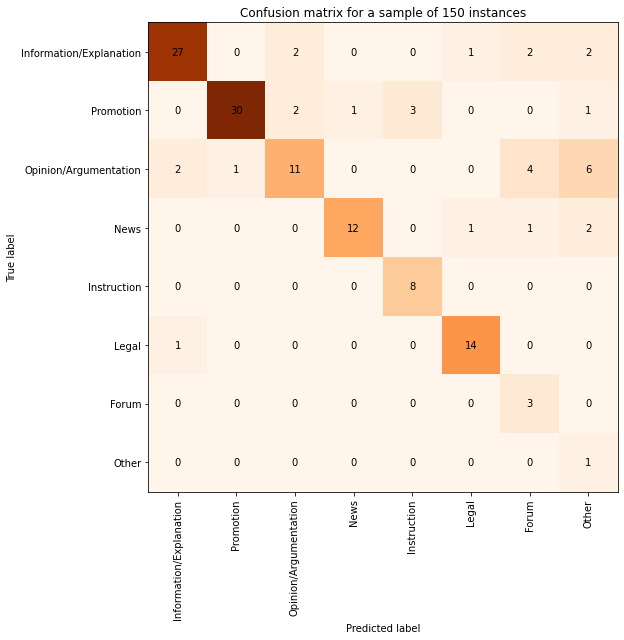

                         precision    recall  f1-score   support

Information/Explanation       0.90      0.77      0.83        35
              Promotion       0.97      0.81      0.88        37
  Opinion/Argumentation       0.73      0.46      0.56        24
                   News       0.92      0.75      0.83        16
            Instruction       0.73      1.00      0.84         8
                  Legal       0.88      0.93      0.90        15
                  Forum       0.30      1.00      0.46         3
                  Other       0.08      1.00      0.15         1

              micro avg       0.77      0.76      0.77       139
              macro avg       0.69      0.84      0.68       139
           weighted avg       0.86      0.76      0.79       139



<Figure size 432x288 with 0 Axes>

In [34]:
LABELS = ['Information/Explanation', 'Promotion', 'Opinion/Argumentation', 'News', 'Instruction', 'Legal', 'Forum', 'Other']

# Analyse results
y_true = final_sample["manual_annotation"].to_list()
y_pred = final_sample["X-GENRE"].to_list()

# Calculate the scores
macro = f1_score(y_true, y_pred, labels=LABELS, average="macro")
micro = f1_score(y_true, y_pred, labels=LABELS,  average="micro")

print(f"Macro f1: {macro:0.3}, Micro f1: {micro:0.3}")

# Plot the confusion matrix:
cm = confusion_matrix(y_true, y_pred, labels=LABELS)
plt.figure(figsize=(9, 9))
plt.imshow(cm, cmap="Oranges")
for (i, j), z in np.ndenumerate(cm):
	plt.text(j, i, '{:d}'.format(z), ha='center', va='center')
classNames = LABELS
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=90)
plt.yticks(tick_marks, classNames)
plt.title(f"Confusion matrix for a sample of 150 instances")

plt.tight_layout()
fig1 = plt.gcf()
plt.show()
plt.draw()
# Save the confusion matrix
fig1.savefig(f"Confusion-matrix-predicted-sample-150-instances-second-round.png",dpi=100)

# Print classification report
print(classification_report(y_true, y_pred, labels = LABELS))